In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('covid_processed.csv',index_col=0)

In [18]:
df.head(3)

,Life exp,Deaths,Deaths_per_1M,Population,GDP_pc,Test_pc,Recovery_rate,Region
Country,,,,,,,,
Spain,1.000000,0.596101,0.442641,0.681069,0.393070,0.456992,0.988008,Southern Europe
Italy,0.997596,0.928193,0.535354,0.876958,0.437076,0.189960,0.974776,Southern Europe
Norway,0.992788,0.021839,0.137446,0.080326,0.995690,0.090506,1.000000,Nordics


In [19]:
df6d=df[['Life exp', 'Deaths', 
       'Deaths_per_1M', 'Population', 'GDP_pc',
       'Recovery_rate', 'Region']].copy()

In [20]:
df6d.columns

Index(['Life exp', 'Deaths', 'Deaths_per_1M', 'Population', 'GDP_pc',
       'Recovery_rate', 'Region'],
      dtype='object')

In [21]:
df6d.Region=df6d.Region.astype('category')
df6d.Region=df6d.Region.cat.reorder_categories(['Balkans','Eastern Europe','Nordics','Western Europe','Southern Europe'])

In [22]:
df6d['CName']=df6d.index.values

In [23]:
df6d.sort_values('Region').CName.values

array(['North Macedonia', 'Bulgaria', 'Montenegro',
       'Bosnia and Herzegovina', 'Croatia', 'Slovenia', 'Ukraine',
       'Romania', 'Moldova', 'Norway', 'Sweden', 'Iceland', 'Finland',
       'Denmark', 'United Kingdom', 'Belgium', 'Ireland', 'Netherlands',
       'France', 'Portugal', 'Italy', 'Greece', 'Spain'], dtype=object)

In [24]:
df6d.CName=df6d.CName.astype('category')
df6d.CName=df6d.CName.cat.reorder_categories(['North Macedonia', 'Bulgaria', 'Montenegro',
       'Bosnia and Herzegovina', 'Croatia', 'Slovenia', 
       'Romania', 'Moldova', 'Ukraine','Norway', 'Sweden', 'Iceland', 'Finland',
       'Denmark', 'Belgium', 'Ireland', 'Netherlands','United Kingdom',
       'France', 'Italy', 'Spain', 'Portugal', 'Greece'])

In [25]:
from sklearn.neighbors import kneighbors_graph
#A=kneighbors_graph(df[['Casablanca','Cape Town']], 20, mode='distance', metric='euclidean').todense()
A=kneighbors_graph(df6d.sort_values('CName').drop(columns=['Region','CName']), 22, mode='distance', metric='minkowski',p=1).todense()

In [26]:
len(df6d)

23

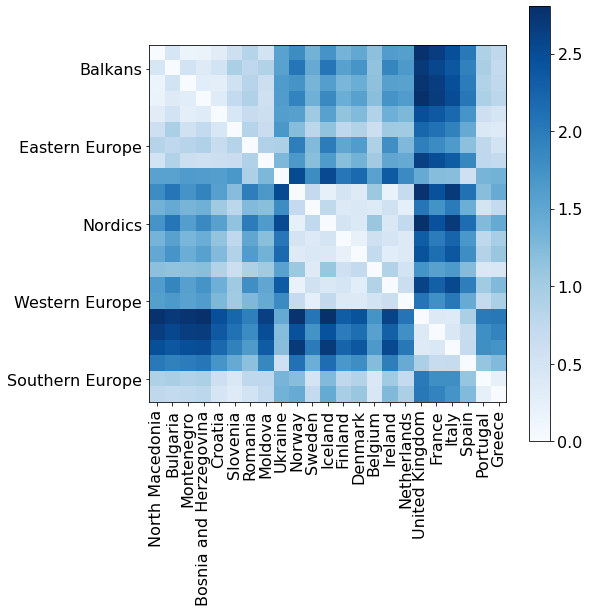

In [30]:
plt.rcParams.update({'font.size': 16})

plt.rcParams['figure.figsize']=(8,8) #rescale figures

plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::5],labels=df6d.sort_values('CName').Region.values[1::5]);
plt.xticks(ticks=np.arange(A.shape[0]),labels=df6d.sort_values('CName').index.values,rotation=90);

#plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
#plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [33]:
# Run PCA with 6 components
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(df6d.drop(columns=['Region','CName']))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])

In [34]:
principalDf.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.548858,0.053070,0.053284,-0.044534,-0.010725,-0.018470
1,0.917338,0.054211,-0.069153,0.045584,-0.032595,-0.019722


In [41]:
principalDf['Region']=df6d.Region.values.astype('category')
principalDf['Country']=df6d.CName.values.astype('category')
principalDf.Region=principalDf.Region.cat.reorder_categories(['Balkans','Eastern Europe','Nordics','Western Europe','Southern Europe'])

In [42]:
principalDf.sort_values('Region').Country.values

['North Macedonia', 'Bulgaria', 'Montenegro', 'Bosnia and Herzegovina', 'Croatia', ..., 'France', 'Portugal', 'Italy', 'Greece', 'Spain']
Length: 23
Categories (23, object): ['North Macedonia', 'Bulgaria', 'Montenegro', 'Bosnia and Herzegovina', ..., 'Italy', 'Spain', 'Portugal', 'Greece']

In [43]:
principalDf.Country=principalDf.Country.astype('category')
principalDf.Country=principalDf.Country.cat.reorder_categories(['North Macedonia', 'Bulgaria', 'Montenegro',
       'Bosnia and Herzegovina', 'Croatia', 'Slovenia',
       'Romania', 'Moldova', 'Ukraine', 'Norway', 'Sweden', 'Iceland', 'Finland',
       'Denmark', 'Belgium', 'Ireland', 'Netherlands','United Kingdom',
       'France', 'Italy', 'Spain', 'Portugal', 'Greece'])

In [47]:
from sklearn.neighbors import kneighbors_graph
#A=kneighbors_graph(df[['Casablanca','Cape Town']], 20, mode='distance', metric='euclidean').todense()
A=kneighbors_graph(principalDf.sort_values('Country').drop(columns=['Region','Country']), 22, mode='distance', metric='euclidean').todense()

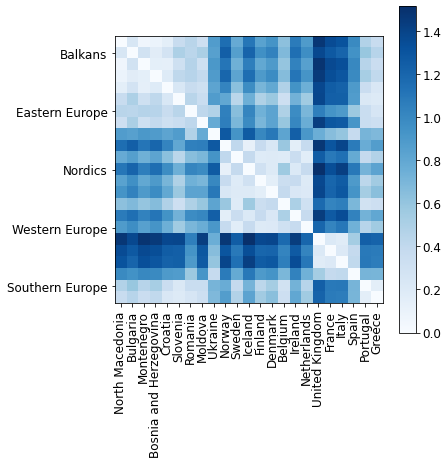

In [48]:
plt.rcParams.update({'font.size': 12})

plt.rcParams['figure.figsize']=(6,6) #rescale figures

plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::5],labels=principalDf.sort_values('Country').Region.values[1::5]);
plt.xticks(ticks=np.arange(A.shape[0]),labels=principalDf.sort_values('Country').Country.values,rotation=90);

#plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
#plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [188]:
from sklearn.neighbors import kneighbors_graph
#A=kneighbors_graph(df[['Casablanca','Cape Town']], 20, mode='distance', metric='euclidean').todense()
A=kneighbors_graph(df.drop(columns=['Region','CName']), 22, mode='distance', metric='minkowski',p=1).todense()

In [189]:
idx=np.arange(len(A))
np.random.shuffle(idx)
A_r=A[idx,:]
A_r=A_r[:,idx]

In [190]:
idx

array([16,  9,  4,  5, 10, 13,  0,  2, 17, 15, 19, 20, 14,  7,  6,  1,  8,
       21, 18, 11, 22, 12,  3])

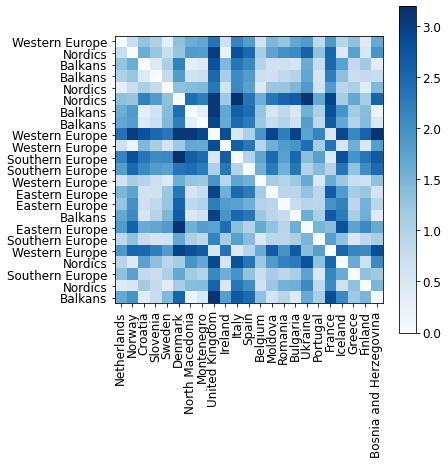

In [191]:
plt.rcParams.update({'font.size': 12})
plt.imshow(A_r,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0]),labels=df['Region'][idx]);#df.index.values);
plt.xticks(ticks=np.arange(A.shape[0]),labels=df.index.values[idx],rotation=90);
plt.rcParams.update({'font.size': 18})


In [192]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)


In [193]:
#X=sub.uns['neighbors']['distances'].todense()
#X=np.abs(X-np.max(X))
X_transformed = embedding.fit_transform(A_r)

C:\Users\leona\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [194]:
dfMDS=pd.DataFrame(X_transformed[:,0:2],columns=['MDS1','MDS2'])
dfMDS['Region']=df['Region'].values[idx]

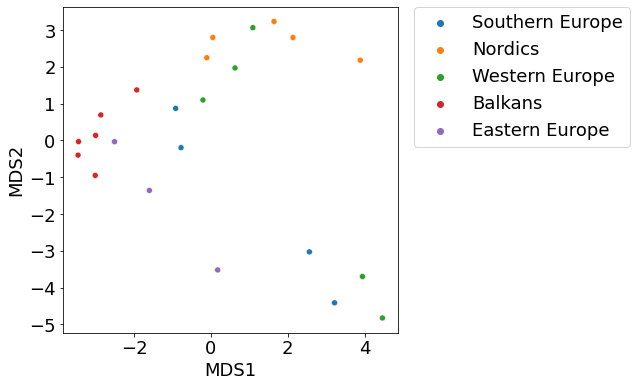

In [196]:
sns.scatterplot(data=dfMDS,x='MDS1',y='MDS2',hue='Region',hue_order=['Southern Europe','Nordics','Western Europe','Balkans','Eastern Europe'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [78]:
len(df)

23

In [87]:
df=df.sort_values('Region')
df['Region']=df['Region'].astype('category')

In [88]:
df.Region=df.Region.cat.reorder_categories(['Balkans','Eastern Europe','Nordics','Western Europe','Southern Europe'])

In [ ]:
df=df.sort_values('Region')


In [101]:
df['CName']=df.index.values
df['CName']=df['CName'].astype('category')
df.CName=df.CName.cat.reorder_categories(['North Macedonia', 'Bulgaria', 'Montenegro',
       'Bosnia and Herzegovina', 'Croatia', 'Slovenia',
       'Romania', 'Moldova', 'Ukraine', 'Norway', 'Sweden', 'Iceland', 'Finland',
       'Denmark', 'Belgium', 'Ireland', 'Netherlands','United Kingdom',
       'France', 'Italy', 'Spain', 'Portugal', 'Greece'])

In [102]:
df=df.sort_values('CName')


In [110]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Deaths', 'Deaths_per_1M', 'Population', 'GDP_pc',
       'Test_pc']], 22, mode='distance', metric='euclidean').todense()


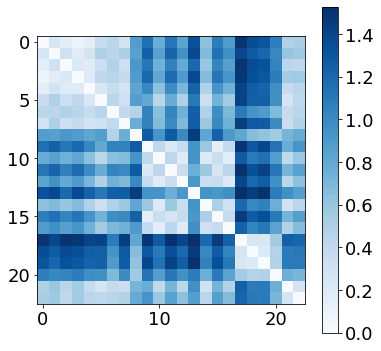

In [111]:
plt.imshow(A,cmap='Blues')
plt.colorbar()
#plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
#plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [197]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Deaths', 'Deaths_per_1M', 'Population', 'GDP_pc',
       'Test_pc']], 10, mode='distance', metric='euclidean').todense()


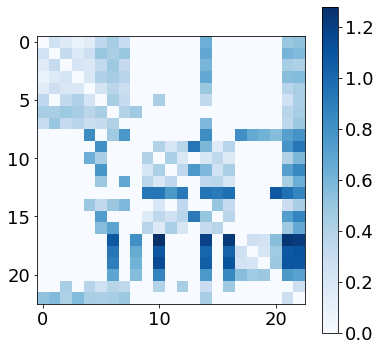

In [198]:
plt.imshow(A,cmap='Blues')
plt.colorbar()


In [199]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Deaths', 'Deaths_per_1M', 'Population', 'GDP_pc',
       'Test_pc']], 3, mode='distance', metric='euclidean').todense()


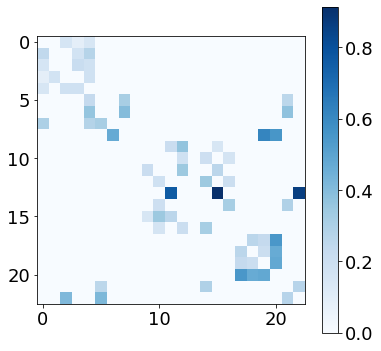

In [200]:
plt.imshow(A,cmap='Blues')
plt.colorbar()

In [117]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Deaths', 'Deaths_per_1M', 'Population', 'GDP_pc',
       'Test_pc']], 22, mode='connectivity', metric='euclidean').todense()


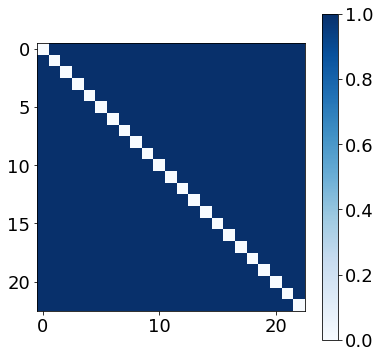

In [118]:
plt.imshow(A,cmap='Blues')
plt.colorbar()
#plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
#plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [144]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Deaths', 'Deaths_per_1M', 'Population', 'GDP_pc',
       'Test_pc']], 10, mode='connectivity', metric='euclidean').todense()


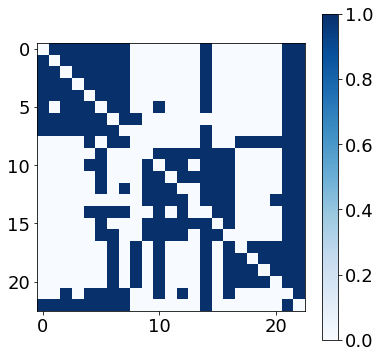

In [145]:
plt.imshow(A,cmap='Blues')
plt.colorbar()


In [142]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Deaths', 'Deaths_per_1M', 'Population', 'GDP_pc',
       'Test_pc']], 3, mode='connectivity', metric='euclidean').todense()


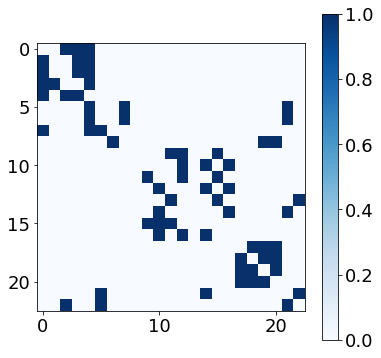

In [143]:
plt.imshow(A,cmap='Blues')
plt.colorbar()

In [161]:
import umap

In [174]:
reducer = umap.UMAP(n_neighbors=22,random_state=42)
embedding = reducer.fit_transform(df.drop(columns=['Region','CName']))

In [175]:
df_umap=pd.DataFrame(embedding, index=df.index,columns=['UMAP1','UMAP2'])
df_umap.head(3)

,UMAP1,UMAP2
Country,,
North Macedonia,0.997724,10.726651
Bulgaria,1.220184,11.310500
Montenegro,0.464445,10.794803


In [176]:
df_umap['Region']=df['Region']

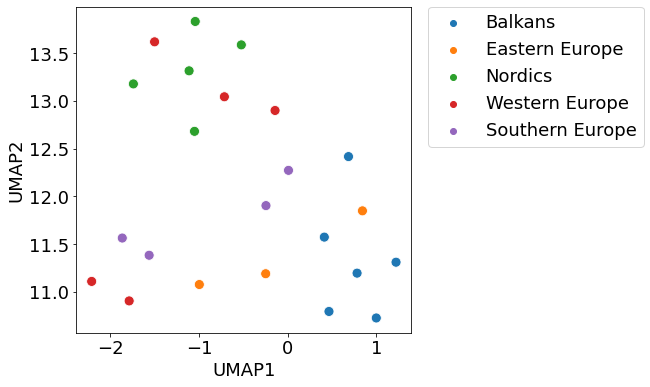

In [177]:
sns.scatterplot(data=df_umap.iloc[0:,:],x='UMAP1',y='UMAP2',hue='Region',s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [178]:
reducer = umap.UMAP(n_neighbors=10,random_state=42)
embedding = reducer.fit_transform(df.drop(columns=['Region','CName']))

In [179]:
df_umap=pd.DataFrame(embedding, index=df.index,columns=['UMAP1','UMAP2'])
df_umap.head(3)

,UMAP1,UMAP2
Country,,
North Macedonia,1.916729,14.439447
Bulgaria,2.035061,13.942244
Montenegro,2.659585,14.570187


In [180]:
df_umap['Region']=df['Region']

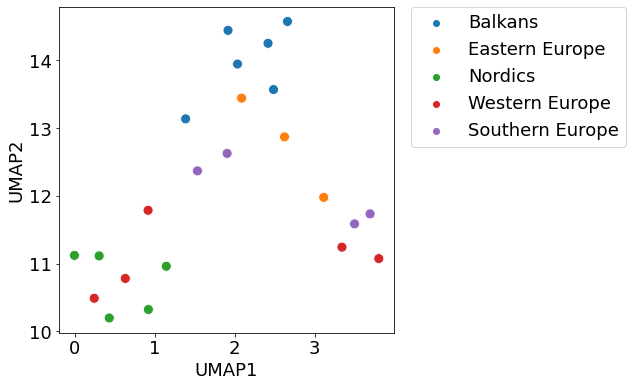

In [181]:
sns.scatterplot(data=df_umap.iloc[0:,:],x='UMAP1',y='UMAP2',hue='Region',s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [182]:
reducer = umap.UMAP(n_neighbors=3,random_state=42)
embedding = reducer.fit_transform(df.drop(columns=['Region','CName']))

In [183]:
df_umap=pd.DataFrame(embedding, index=df.index,columns=['UMAP1','UMAP2'])
df_umap.head(3)

,UMAP1,UMAP2
Country,,
North Macedonia,14.203319,12.040259
Bulgaria,14.861064,11.836256
Montenegro,13.938836,12.139067


In [184]:
df_umap['Region']=df['Region']

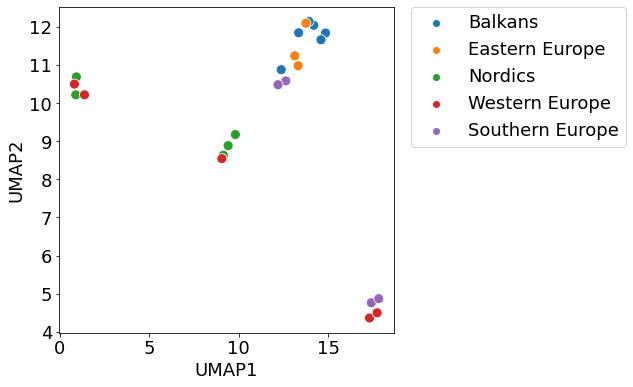

In [185]:
sns.scatterplot(data=df_umap.iloc[0:,:],x='UMAP1',y='UMAP2',hue='Region',s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)